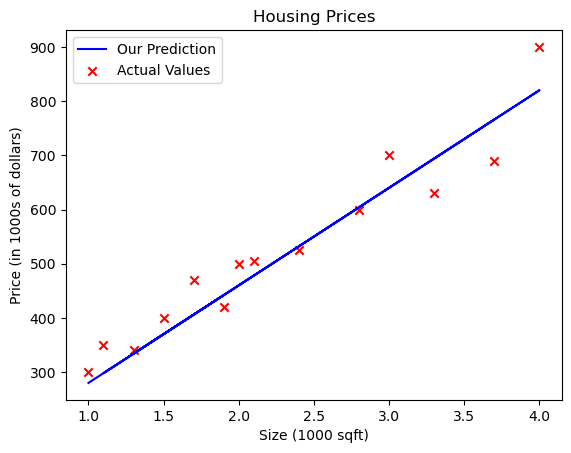

$316 thousand dollars


In [6]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')



# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0, 3.0, 4.0, 1.1, 1.5, 1.7, 1.9, 1.3, 2.1, 2.4, 2.8, 3.3,3.7])
y_train = np.array([300.0, 500.0 ,700.0, 900.0, 350.0, 400.0, 470.0, 420.0, 340.0, 505.0, 525.0, 600.0, 630.0, 690.0])


w = 180
b = 100

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb



tmp_f_wb = compute_model_output(x_train, w, b,)
# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()



x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

